In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore')

## Chebyshev's Bounds: "Tail" Bounds ##

In [2]:
# Proportion in the range "mean +/- 3.5 SDs"
# Chebyshev's bound: this proportion is AT LEAST
z = 3.5
1 - 1/z**2

0.9183673469387755

In [3]:
# Proportion in the range "mean +/- 0.5 SDs"
# Chebyshev's bound: this proportion is AT LEAST
z = 0.5
1 - 1/z**2

-3.0

In [4]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

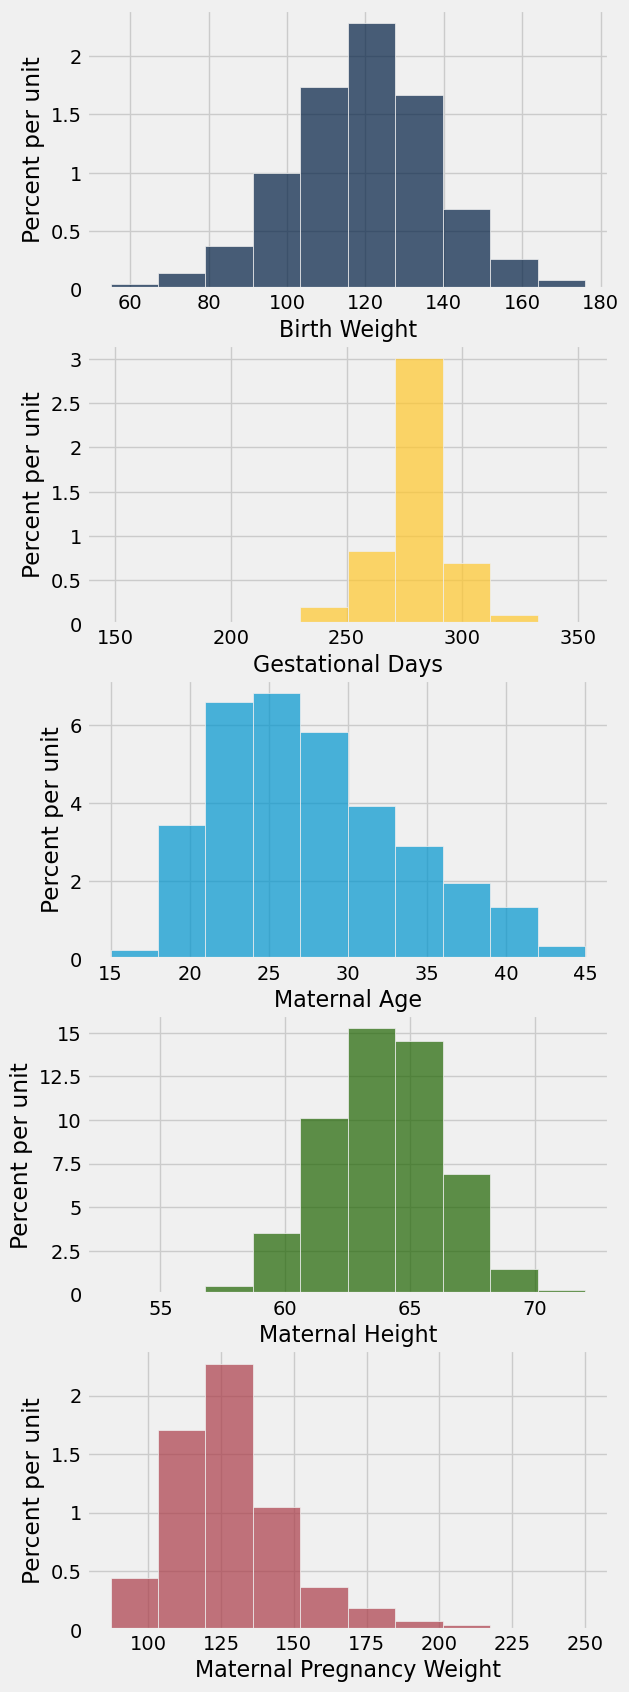

In [5]:
births.hist(overlay = False)

In [6]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [7]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))

In [8]:
# Proportion within 3 SDs of the mean

within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [9]:
# Chebyshev's bound: 
# This proportion should be at least

1 - 1/3**2

0.8888888888888888

In [10]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

In [11]:
# See if Chebyshev's bounds work for distributions with various shapes

for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')


Birth Weight
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 5 SDs: 99.91 %


## Standard Units ##

In [12]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.mean(x)) / np.std(x)

In [13]:
ages = births.column('Maternal Age')
ages

array([27, 33, 28, ..., 30, 21, 38])

In [14]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.8153604041908968)

In [15]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [16]:
np.mean(ages_standard_units), np.std(ages_standard_units)


(-7.868020072300939e-17, 1.0)

## The SD and Bell Shaped Curves 

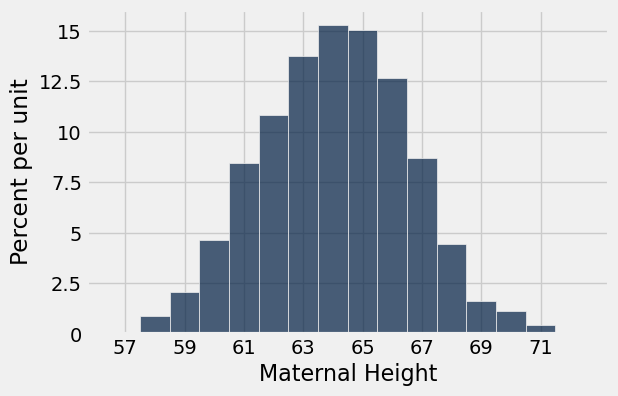

In [17]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.xticks(np.arange(57, 72, 2));

Estimates by eye

The average is approximately: 

Locate the point of inflection on the right. 
The SD is approximately:

In [18]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

## Central Limit Theorem ##

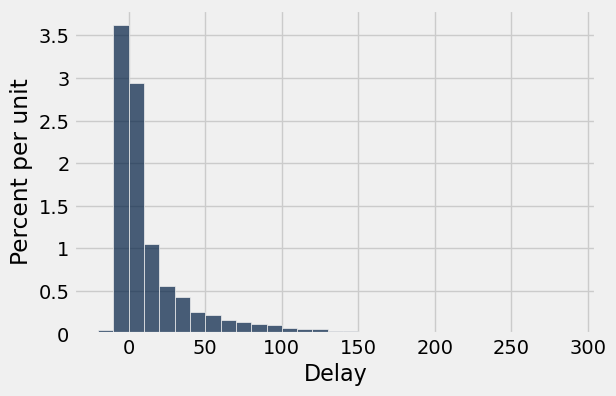

In [19]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [20]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)
population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [21]:
percentile(50, delays)

2

In [22]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [23]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [24]:
sample_means_100 = ten_thousand_sample_means(100)
sample_means_100

array([ 17.08,  18.9 ,  21.36, ...,  12.45,  13.8 ,  23.12])

In [25]:
len(sample_means_100)

10000

Population Average: 16.6581555154


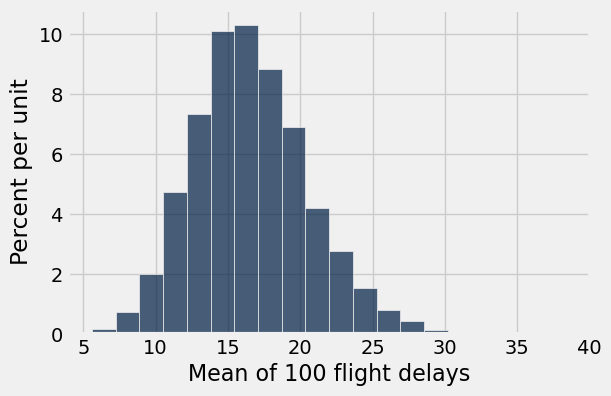

In [26]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', population_mean)

Population Average: 16.6581555154


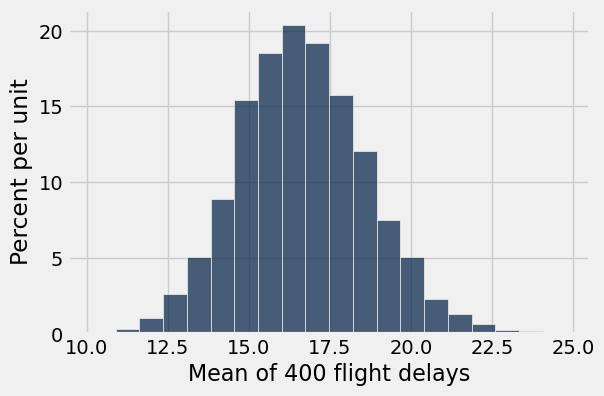

In [27]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', population_mean)

In [28]:
sample_means_900 = ten_thousand_sample_means(900)

In [29]:
means_tbl = Table().with_columns(
    '100', sample_means_100,
    '400', sample_means_400,
    '900', sample_means_900,
)

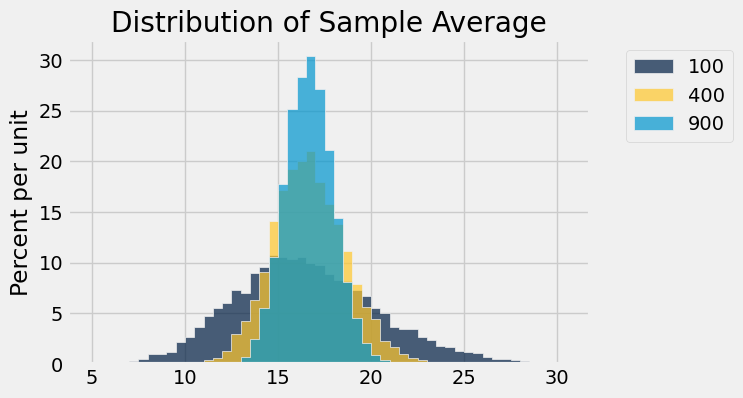

In [30]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

### Relationship Between Population SD and Sample Size

In [31]:
"""Empirical distribution of random sample means"""
def plot_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", population_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.686554
Population SD: 39.4801998516
SD of sample means: 3.96008063366


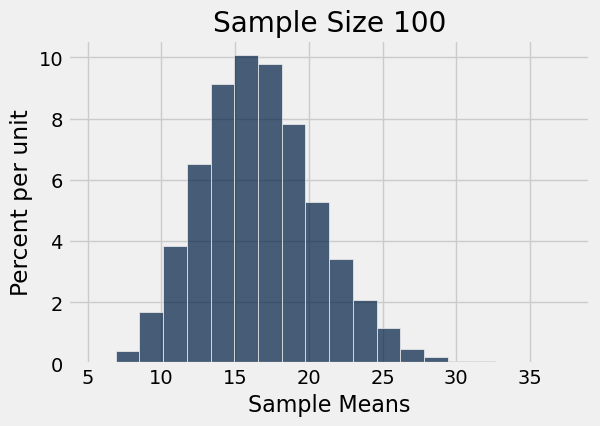

In [32]:
plot_sample_means(100)

In [33]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.660805
Population SD: 39.4801998516
SD of sample means: 1.98080357071


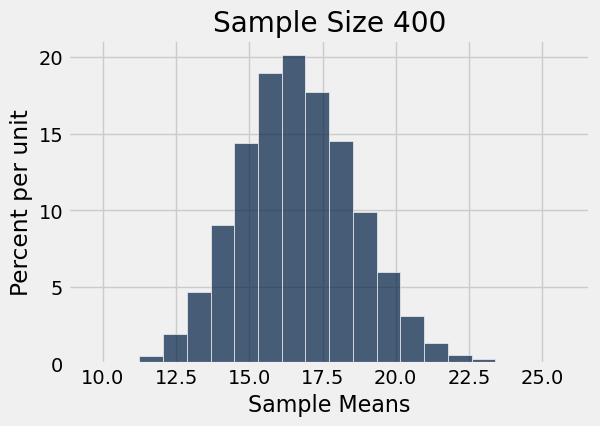

In [34]:
plot_sample_means(400)

In [35]:
39.48 / 1.973

20.010136847440442

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.64256384
Population SD: 39.4801998516
SD of sample means: 1.58535888662


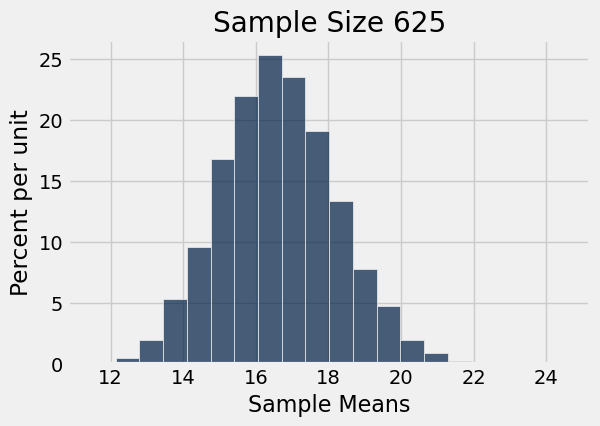

In [36]:
plot_sample_means(625)

In [37]:
39.48 / 1.577

25.034876347495242

In [38]:
39.48 / np.sqrt(100)

3.9479999999999995

In [39]:
39.48 / np.sqrt(400)

1.9739999999999998

In [40]:
39.48 / np.sqrt(625)

1.5791999999999999

## Variability of the Sample Mean

In [41]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [42]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.96127,3.94802
150,3.19857,3.22354
200,2.82594,2.79167
250,2.51826,2.49695
300,2.29671,2.27939
350,2.139,2.11031
400,1.96436,1.97401
450,1.87214,1.86111
500,1.76623,1.76561
550,1.67595,1.68344


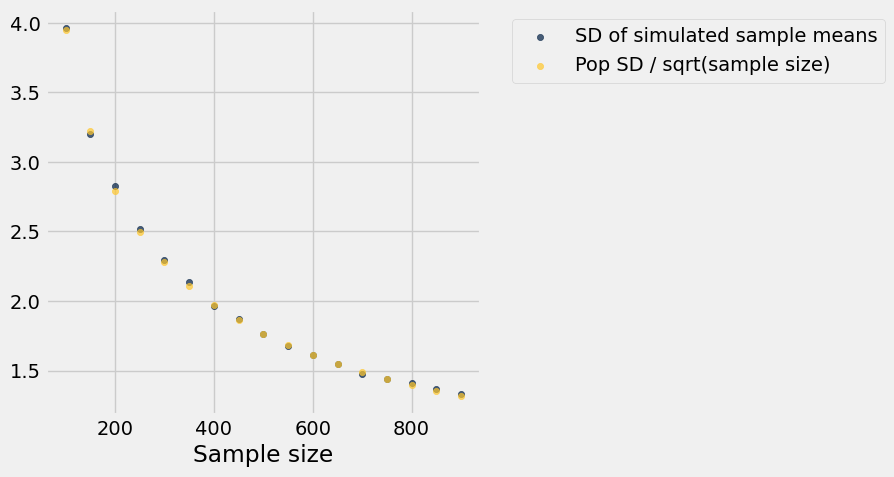

In [43]:
sd_table.scatter('Sample size')

## Other distributions

In [44]:
sf_salaries = Table.read_table("san_francisco_2019.csv")
sf_salaries.hist("Salary")

FileNotFoundError: [Errno 2] No such file or directory: 'san_francisco_2019.csv'

In [ ]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_salaries = sf_salaries.sample(sample_size)
    return np.mean(sampled_salaries.column('Salary'))

In [ ]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 salaries', sample_means_400).hist(bins=20)
print('Population Average:', np.mean(sf_salaries.column("Salary")))